# Objectives

1. Preparing the data
- Examine the data 
- Clean the data
  - missing data 
      - df.drop(axis = 1): drop columns 
      - df.dropna (subset = ): drop rows 
  - datatype: dtypes; astype()
  - Creating a DatetimeIndex: 
      - df.replace('/', '-')
      - df.date.str.cat(df.time, sep = ' ' )
2. Explore the relationship
- Counting unique values for categorical data: 
    - .value_counts(): excluding Nan by default
    - .value_counts().sum() -> total row 
    - .value_counts(normalize = True) -> proportion
- Filter 
    - by one condition
    - by multipe conditions: &, |
- Correlation, not causation
    - math with boolean values
    - compare with groupby(str)
    - searching for a string
3. Visual exploratory data analysis
    - Accessing datetime attributes
    - .dt.month()
    - .index.month()
    - Resampling: df[col].resample('W').mean() -> for datetime_like type
    - Computing a frequency table: pd.crosstab(row, column)
4. Analyzing the dataset
    - Examine the dateset: statistic 
    - Convert to categorical data tyoe
        - cats = pd.CategoricalDtype(['short', 'medium', 'long'], ordered = True)
        - traffic['stop_length'] = traffic.stop_length.astype(cats)
    - Merging dataests
    - Converting a multi-index Series to DataFrame
    - multi-index Series.unstack()
    - pivot_table()

## 1. Preparing the data
- Examine the data 
- Clean the data
  - missing data 
      - df.drop(axis = 1): drop columns 
      - df.dropna (subset = ): drop rows 
  - datatype: dtypes; astype()
  - Creating a DatetimeIndex: 
      - df.replace('/', '-')
      - df.date.str.cat(df.time, sep = ' ' )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv'
traffic = pd.read_csv(url)
traffic.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [168]:
url = 'https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv'
weather = pd.read_csv(url)
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


**traffic dataset**

In [6]:
traffic.isna().sum().sort_values()

state                     0
stop_date                 0
stop_time                 0
search_conducted          0
drugs_related_stop        0
district                  0
driver_race            5202
violation_raw          5202
violation              5202
stop_outcome           5202
is_arrested            5202
stop_duration          5202
driver_gender          5205
search_type           88434
county_name           91741
dtype: int64

In [7]:
traffic.shape

(91741, 15)

In [18]:
# drop country_name 
traffic.drop('county_name', axis = 1, inplace = True)
traffic.head(2)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [19]:
traffic.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [20]:
traffic.is_arrested.dtype

dtype('O')

**Cast to_datetime()**

In [21]:
# create datetime of stop #
traffic.stop_date = traffic.stop_date.replace('/','-')
traffic.stop_date.head(3)

0    2005-01-04
1    2005-01-23
2    2005-02-17
Name: stop_date, dtype: object

In [24]:
combined = traffic.stop_date.str.cat(traffic.stop_time, sep=' ')
combined.head(3)

0    2005-01-04 12:55
1    2005-01-23 23:15
2    2005-02-17 04:15
Name: stop_date, dtype: object

In [28]:
traffic['stop_datetime'] = pd.to_datetime(combined)
traffic.head(2)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00


In [29]:
traffic['stop_datetime'].dtype

dtype('<M8[ns]')

In [45]:
traffic.set_index('stop_datetime', inplace = True)
print(traffic.index)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=91741, freq=None)


In [46]:
traffic.to_csv('/QXJ/Python/Datacamp/traffic.csv')

## 2. Explore the relationship
- Counting unique values for categorical data: 
    - .value_counts(): excluding Nan by default
    - .value_counts().sum() -> total row 
    - .value_counts(normalize = True) -> proportion
- Filter 
    - by one condition
    - by multipe conditions: &, |
- Correlation, not causation
    - math with boolean values
    - compare with groupby
    - searching for a string

In [158]:
traffic = pd.read_csv('/QXJ/Python/Datacamp/traffic.csv')
traffic.head(2)

,stop_datetime,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


**Value counts**

In [3]:
traffic.stop_outcome.value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [4]:
# check the total rows
traffic.stop_outcome.value_counts().sum()

86539

**Filtering DataFrame**

In [10]:
arrest = traffic[traffic['stop_outcome'] == 'Arrest Driver']
arrest.shape

(2735, 15)

In [12]:
arrest.driver_race.value_counts(normalize=True)

White       0.543327
Black       0.243876
Hispanic    0.196709
Asian       0.015356
Other       0.000731
Name: driver_race, dtype: float64

In [15]:
traffic['driver_gender'].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64

In [16]:
female_arrested = traffic[(traffic['stop_outcome'] == 'Arrest Driver') &
                          (traffic['driver_gender'] == 'F')]
female_arrested.shape

(556, 15)

**Math with Boolean type data**

In [56]:
traffic.is_arrested.dtype

dtype('O')

In [151]:
traffic.is_arrested.astype('boolean')

0        False
1        False
2        False
3         True
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: is_arrested, Length: 91741, dtype: boolean

In [19]:
traffic.is_arrested.value_counts(normalize=True)

False    0.964432
True     0.035568
Name: is_arrested, dtype: float64

In [20]:
traffic.is_arrested.mean()

0.03556777868937704

**Comparing with groupby(str)**

In [24]:
traffic.groupby(['district', 'driver_gender'])['is_arrested'].mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

**Searching for a string**

In [26]:
traffic.search_conducted.value_counts()

False    88434
True      3307
Name: search_conducted, dtype: int64

In [29]:
traffic.search_type.value_counts(dropna=False)

NaN                                                         88434
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [33]:
# searching for a string 
# return false when it finds a missing value
traffic['inventory'] = traffic['search_type'].str.contains('Inventory', na = False)

In [34]:
traffic['inventory'].dtype

dtype('bool')

In [35]:
traffic['inventory'].head(3)

0    False
1    False
2    False
Name: inventory, dtype: bool

In [36]:
traffic['inventory'].sum()
# 441 times of search include inventory, more than 219 which is alone inventory

441

In [37]:
# calculating the inventory rate: noted if there are other column based conditions!!
searched = traffic[traffic['search_conducted']==True].inventory.mean()
searched

0.13335349259147264

## 3. Visual exploratory data analysis
- Accessing datetime attributes
- .dt.month()
- .index.month()
- Resampling: df[col].resample('W').mean() -> for datetime_like type
- Computing a frequency table: pd.crosstab(row, column)

**Accessing datetime attributes**

In [44]:
traffic.reset_index(drop=True)

,stop_datetime,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory
0,2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
1,2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
2,2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
3,2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False
4,2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31 21:21:00,RI,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,False
91737,2015-12-31 21:59:00,RI,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False
91738,2015-12-31 22:04:00,RI,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,False
91739,2015-12-31 22:09:00,RI,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,False


In [47]:
traffic['stop_datetime'] = pd.to_datetime(traffic['stop_datetime'])

In [48]:
traffic['stop_datetime'].dtype

dtype('<M8[ns]')

In [50]:
traffic['month'] = traffic['stop_datetime'].dt.month
traffic['month'].head(2)

0    1
1    1
Name: month, dtype: int64

In [152]:
traffic.set_index('stop_datetime', inplace = True)

In [52]:
traffic.head(2)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,month
stop_datetime,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,1
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,1


In [53]:
traffic.index.month

Int64Index([ 1,  1,  2,  2,  2,  3,  3,  4,  7,  7,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='stop_datetime', length=91741)

In [64]:
is_arrested_mean = traffic.groupby(traffic.index.month).is_arrested.mean()
is_arrested_mean

stop_datetime
1     0.038462
2     0.035282
3     0.036825
4     0.033676
5     0.035872
6     0.030998
7     0.038071
8     0.036572
9     0.030653
10    0.036113
11    0.033070
12    0.041262
Name: is_arrested, dtype: float64

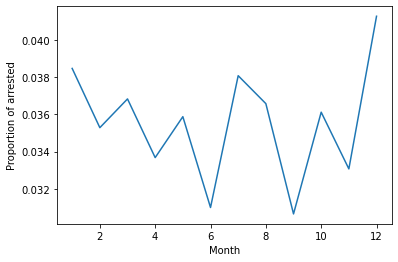

In [66]:
plt.plot(is_arrested_mean)
plt.xlabel('Month')
plt.ylabel('Proportion of arrested')
plt.show()

**Resampling**
<br>

*Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data.*


Most commonly used time series frequency are –
- W : weekly frequency
- M : month end frequency
- SM : semi-month end frequency (15th and end of month)
- Q : quarter end frequency

In [74]:
monthly_arrested = traffic['is_arrested'].resample('M').mean()

In [75]:
monthly_drug = traffic['drugs_related_stop'].resample('M').mean()

In [79]:
df = pd.concat([monthly_arrested, monthly_drug], axis = 1)
df = df.dropna(subset = ['is_arrested', 'drugs_related_stop'])
df.head()

,is_arrested,drugs_related_stop
stop_datetime,,
2005-01-31,0.000000,0.0
2005-02-28,0.333333,0.0
2005-03-31,0.000000,0.0
2005-04-30,0.000000,0.0
2005-07-31,0.000000,0.0


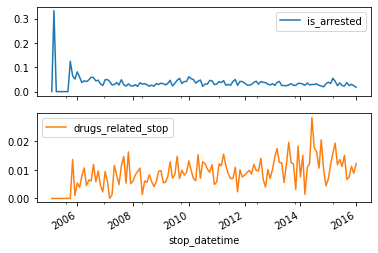

In [83]:
df.plot( subplots = True )
plt.show()

In [86]:
table = pd.crosstab(traffic.driver_race, traffic.driver_gender, normalize = True)
table

driver_gender,F,M
driver_race,,
Asian,0.006367,0.021240
Black,0.030981,0.110983
Hispanic,0.022569,0.089835
Other,0.000612,0.002450
White,0.214200,0.500763


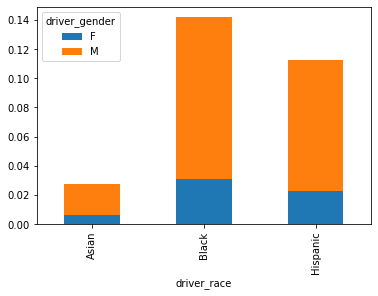

In [93]:
table_small = table.loc['Asian':'Hispanic']
table_small.plot(kind = 'bar', stacked = True)
plt.show()

**Change datatype using map method**
- .astype() only works when pands can infer how the convertion should be done
- mapping = {} -> df[col_1] = df[col_1].map(mapping)
- replace()

In [111]:
traffic_violation = traffic.groupby('violation')['search_conducted'].mean().sort_values(ascending = False)
traffic_violation

violation
Registration/plates    0.093438
Equipment              0.064274
Moving violation       0.057014
Other                  0.045351
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

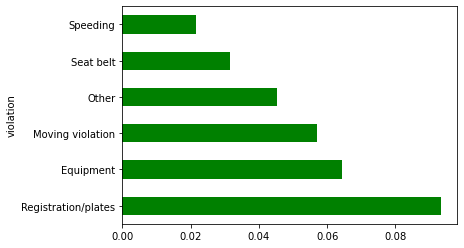

In [108]:
traffic_violation.plot( kind = 'barh', color = 'green')
plt.show()

In [116]:
# Print the unique values in 'stop_duration'
print(traffic.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min':45 }

# Convert the 'stop_duration' strings to integers using the 'mapping'
traffic['stop_minutes'] = traffic.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(traffic.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


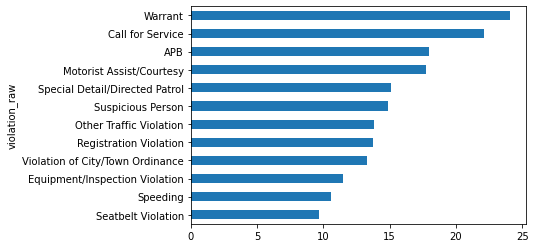

In [118]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(traffic.groupby('violation_raw')['stop_minutes'].mean())

# Save the resulting Series as 'stop_length'
stop_length = traffic.groupby('violation_raw')['stop_minutes'].mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

## 4. Analyzing the dataset
- Examine the dateset: statistic 
- Convert to categorical data tyoe
    - cats = pd.CategoricalDtype(['short', 'medium', 'long'], ordered = True)
    - traffic['stop_length'] = traffic.stop_length.astype(cats)
- Merging dataests
- Converting a multi-index Series to DataFrame
- multi-index Series.unstack()
- pivot_table()

**Switching to the weather dataset**

In [124]:
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [126]:
weather[['AWND','WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


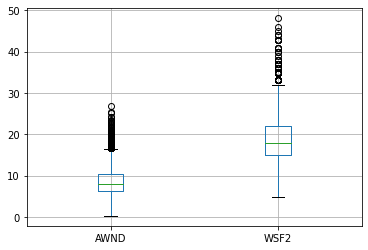

In [127]:
weather[['AWND','WSF2']].boxplot()
plt.show()

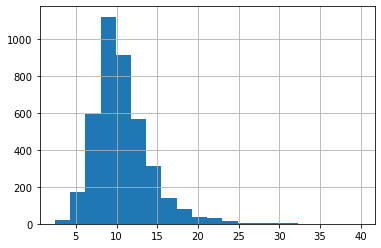

In [130]:
weather['WDIFF'] = weather['WSF2'] - weather['AWND']
weather['WDIFF'].hist(bins = 20)
plt.show()
# no value below 0

In [131]:
weather.shape

(4017, 28)

In [166]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WDIFF'],
      dtype='object')

**Subsetting dataset**

In [133]:
temp = weather.loc[:,'TAVG':'TMAX']
temp.shape

(4017, 3)

In [134]:
temp.columns

Index(['TAVG', 'TMIN', 'TMAX'], dtype='object')

In [136]:
# aggregate based on columns 
temp.sum(axis = 1).head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

In [137]:
traffic.head(3)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_minutes
stop_datetime,,,,,,,,,,,,,,,
2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,8.0
2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,8.0
2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,8.0


**Convert to catogory**

In [159]:
mapping = {'0-15 Min': 'short',
          '16-30 Min': 'medium',
          '30+ Min': 'long'}
traffic['stop_length'] = traffic.stop_duration.map(mapping)
traffic['stop_length'].dtype
traffic['stop_length'].head(2)

0    short
1    short
Name: stop_length, dtype: object

In [160]:
cats = pd.CategoricalDtype(['short', 'medium', 'long'], ordered = True)
traffic['stop_length'] = traffic.stop_length.astype(cats)
traffic['stop_length'].memory_usage(deep=True)

92163

In [161]:
traffic.stop_length.head()

0     short
1     short
2     short
3    medium
4     short
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [162]:
# after order the categories, you can use comparison
traffic[traffic.stop_length > 'short'].shape

(16960, 16)

In [163]:
traffic.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261491
Name: is_arrested, dtype: float64

**Merging the datasets**

In [169]:
# Reset the index of 'ri'
traffic.reset_index(inplace = True)
print(traffic.head(3))

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather.loc[:, ['DATE','TAVG']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

   level_0  index        stop_datetime state   stop_date stop_time  \
0        0      0  2005-01-04 12:55:00    RI  2005-01-04     12:55   
1        1      1  2005-01-23 23:15:00    RI  2005-01-23     23:15   
2        2      2  2005-02-17 04:15:00    RI  2005-02-17     04:15   

  driver_gender driver_race                   violation_raw  violation  \
0             M       White  Equipment/Inspection Violation  Equipment   
1             M       White                        Speeding   Speeding   
2             M       White                        Speeding   Speeding   

   search_conducted search_type stop_outcome is_arrested stop_duration  \
0             False         NaN     Citation       False      0-15 Min   
1             False         NaN     Citation       False      0-15 Min   
2             False         NaN     Citation       False      0-15 Min   

   drugs_related_stop district stop_length  
0               False  Zone X4       short  
1               False  Zone K3     

In [171]:
traffic_wind = traffic.merge(weather_rating, left_on = 'stop_date', right_on='DATE', how = 'left')
traffic_wind.head()

,level_0,index,stop_datetime,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_length,DATE,TAVG
0,0,0,2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,short,2005-01-04,42.0
1,1,1,2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,short,2005-01-23,17.0
2,2,2,2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,short,2005-02-17,34.0
3,3,3,2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,medium,2005-02-20,26.0
4,4,4,2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,short,2005-02-24,24.0


In [173]:
traffic_wind.set_index('stop_datetime', inplace = True)

**Convert a multi-indexed Series to a DataFrame**

In [174]:
search_rate = traffic.groupby(['violation', 
                              'driver_gender'])['search_conducted'].mean()
type(search_rate.index)

pandas.core.indexes.multi.MultiIndex

In [175]:
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [176]:
search_rate.loc['Speeding']

driver_gender
F    0.008309
M    0.027885
Name: search_conducted, dtype: float64

In [180]:
search_rate.loc['Speeding','F']

0.008308832928544037

In [181]:
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [182]:
type(search_rate)

pandas.core.series.Series

**Pivot table**

In [184]:
# mean is the default aggregation function
traffic.pivot_table(index = 'violation',
                    columns = 'driver_gender', 
                   values = 'search_conducted',
                   aggfunc = 'count')

driver_gender,F,M
violation,,
Equipment,2501,8420
Moving violation,3286,12938
Other,707,3702
Registration/plates,1056,2647
Seat belt,578,2278
Speeding,15646,32777


In [185]:
traffic.to_csv('/QXJ/Python/Datacamp/traffic.csv')

In [186]:
weather.to_csv('/QXJ/Python/Datacamp/weather.csv')

In [187]:
traffic_wind.to_csv('/QXJ/Python/Datacamp/traffic_wind.csv')